<a href="https://colab.research.google.com/github/mohIITech/learning_machine_learning/blob/colab/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# making a dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=50, class_sep=1.5)

dataset = pd.DataFrame(X)
dataset.columns = ['CGPA', 'Luck']
dataset['y'] = y

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CGPA    100 non-null    float64
 1   Luck    100 non-null    float64
 2   y       100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [3]:
dataset.head()

,CGPA,Luck,y
0,0.442848,1.771688,1
1,-2.368745,-0.027994,0
2,-1.582121,-1.388139,1
3,-1.582004,-0.530537,0
4,1.338973,0.725573,1


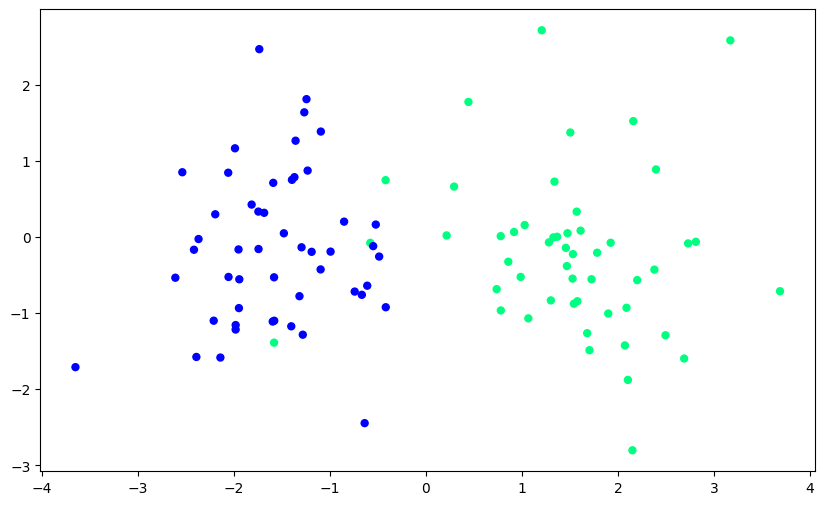

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:,0], X[:,1], c=y, cmap="winter", s=25)

In [5]:
def perceptron(X, y):
  X = np.insert(X, 0, 1, axis=1)
  weights = np.ones(X.shape[1])
  lr = 0.1
  epochs=1000

  for i in range(epochs):
    j = np.random.randint(0, 100)
    y_hat = step(np.dot(X[j], weights))
    weights = weights + lr*(y[j]- y_hat)*X[j]

  return weights[0], weights[1:]

In [6]:
def step(z):
  return 1 if z>0 else 0

In [7]:
intercept_, coef_= perceptron(X, y)

In [8]:
intercept_

np.float64(0.30000000000000016)

In [9]:
coef_

array([0.67788897, 0.09610712])

In [10]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [11]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

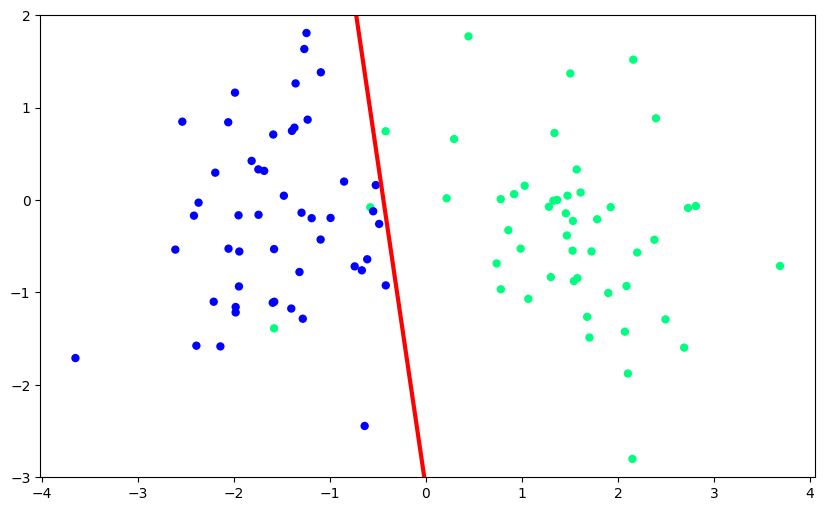

In [12]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=25)
plt.ylim(-3,2)